In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Data
def load_data(data_file):
    df = pd.read_csv(data_file, skiprows=1)
    return df

def osc_plotter(time_values,y_values):
    plt.figure(figsize=(10, 6))
    plt.plot(time_values,y_values)
    plt.title('Oscilating Mass')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

def get_hz(time_values,y_values):
    # Calculate the time step from the first two time values
    dt = time_values[1] - time_values[0]
    # Perform the FFT
    fft_y = np.fft.fft(y_values)
    n = len(fft_y)
    freq = np.fft.fftfreq(n, d=dt)
    # Find the peak frequency
    peak_freq_index = np.argmax(np.abs(fft_y))
    peak_freq = freq[peak_freq_index]
    return peak_freq

def get_time_range(fps, x_data):
    data_length = len(x_data)
    time_max = data_length/fps
    range_values = np.linspace(0, time_max, num=data_length)
    return range_values
    



32.19021490626429


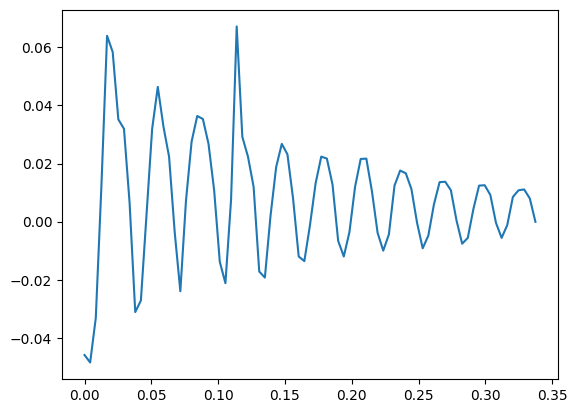

In [52]:
# No Mass
noMass = load_data("NoMass.txt")
time_range = get_time_range(240, noMass['t'])
noMass_hz = get_hz(time_range, noMass['y'])
print(noMass_hz)
plt.plot(time_range, noMass['y'])

17.04866562009419


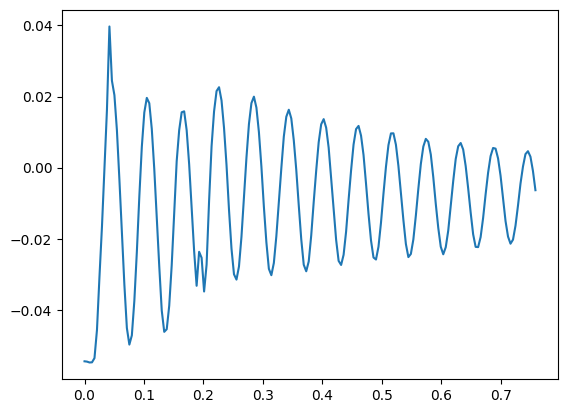

In [11]:
# Large Mass
largeMass = load_data("LargeMass.txt")
time_range = get_time_range(240, largeMass['t'])
largeMass_hz = get_hz(time_range, largeMass['y'])
# osc_plotter(largeMass['t'], largeMass['y'])
plt.plot(time_range, largeMass['y'])
print(largeMass_hz)

0.04692592592592592
21.31018153117601


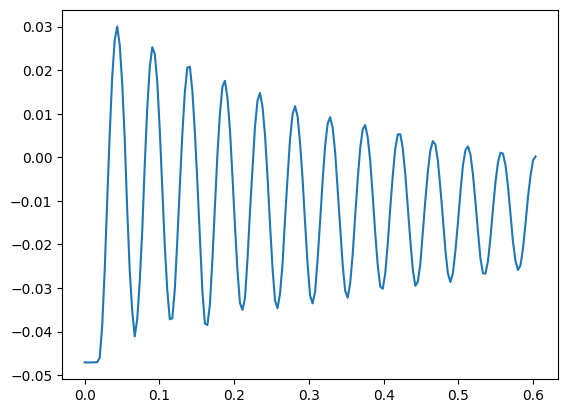

In [51]:
# Small Mass
smallMass = load_data("SmallMass.txt")
time_range = get_time_range(300, smallMass['t'])
smallMass_hz = get_hz(time_range, smallMass['y'])
# osc_plotter(smallMass['t'], smallMass['y'])

smallMass['ts'] = time_range
# print(smallMass[smallMass['y'] == max(smallMass['y'])]['ts'].values[0])
section = smallMass[smallMass['t'] > 0.5]
# print(section[section['y'] == max(section['y'])]['ts'].values[0])
# plt.vlines()

period_time = section[section['y'] == max(section['y'])]['ts'].values[0] - smallMass[smallMass['y'] == max(smallMass['y'])]['ts'].values[0]
print(period_time)
smallMass_hz = 1/period_time
print(smallMass_hz)
plt.plot(smallMass['ts'], smallMass['y'])